In [1]:
# Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Plot Style
plt.rcParams.update({
    "figure.figsize": (12,6),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
     "axes.titleweight": "bold"
})

### **QUESTION 1**

**Market (MKT)**

The market factor reflects broad systematic risk, so higher exposure means bearing more covariance with aggregate consumption risk. Investors demand compensation for this undiversifiable risk, leading to a positive expected premium.

**SMB (Size)**

Small firms are typically more financially constrained and riskier, which makes their cash flows more sensitive to economic downturns. Investors require a premium to hold these less established, more volatile companies.

**HML (Value)**

Value stocks (high book-to-market) often are distressed or neglected, making them riskier during downturns. Because of this counter-cyclical risk, they earn higher expected returns than growth stocks.

**RMW (Profitability)**

More profitable firms tend to have more persistent cash flows and lower distress risk. Low-profitability firms therefore require a premium to attract investors, making profitability a predictor of expected returns.

**CMA (Investment)**

Firms that invest aggressively are riskier because they expand when conditions look favorable, exposing them to downturn risk. Low-investment firms are more conservative and stable, so high-investment firms must offer higher expected returns.

**UMD (Momentum)**

Stocks that have performed well in the recent past tend to continue outperforming due to underreaction, slow-moving capital, or behavioral biases. Momentum therefore captures return persistence not explained by fundamentals alone.

**ROE (Return on Equity)**

High ROE firms generate strong earnings relative to equity and signal operational efficiency. These firms are more resilient, so low-ROE firms must offer higher returns to compensate investors for additional risk.

**IA (Investment-to-Assets)**

Firm investment intensity signals expectations embedded in valuation; high investment is often associated with overvaluation or lower marginal profitability of capital. Thus low-IA firms earn higher risk-adjusted returns than high-IA firms.

**BAB (Betting Against Beta)**

High-beta stocks are over-demanded by constrained investors seeking leverage, making low-beta stocks underpriced. Leveraging low-beta stocks (and shorting high-beta) historically yields excess returns to exploit this mispricing.

To compute $\theta$, we need to maximize the mean-variance objective as follows :

$$
\underbrace{\max_{\theta} \left( \mu' \theta - \frac{\gamma}{2}\theta' \Sigma \theta \right)}_{\text{Mean–variance objective}}
\quad \Longrightarrow \quad
\boxed{\theta^* = \frac{1}{\gamma}\Sigma^{-1}\mu}
$$

Where:
$$
\theta = \text{vector of portfolio weights in the 9 factors (9×1)}, \\
\mu = \text{vector of expected factor returns (9×1)}, \\
\Sigma = \text{covariance matrix of factor returns (9×9)}, \\
\gamma = \text{risk-aversion parameter (scalar, here } \gamma = 5).
$$


In [28]:
# Import & Format Excel File
facts = pd.read_csv('QPM-FactorsData-ForAssignment-04(Sheet1).csv', delimiter=';')
facts = facts.set_index('Dates')
facts.index = pd.to_datetime(facts.index, format='%Y%m')
facts = facts.apply(lambda col: col.str.replace(',', '.').astype(float))
facts.head()

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Dates,,,,,,,,,
1967-02-01,0.0078,0.0334,-0.0217,0.0194,-0.0094,0.0356,0.035317,-0.002064,0.0262
1967-03-01,0.0399,0.0163,0.0031,0.0090,-0.0151,0.0142,0.018876,-0.016933,0.0081
1967-04-01,0.0389,0.0062,-0.0264,0.0243,-0.0375,0.0064,0.010983,-0.029519,0.0171
1967-05-01,-0.0433,0.0198,0.0080,-0.0175,0.0161,0.0067,0.005234,0.024686,0.0201
1967-06-01,0.0241,0.0596,0.0096,-0.0064,-0.0239,0.0603,0.002945,-0.021700,-0.0163


In [34]:
# Computation of weights for a mean-variance optimal investor

# Estimation of expected excess return vector and covariance matrix
mu = facts.mean()
cov = facts.cov()

# Investor risk aversion
gamma = 5

# Compute optimal vectors
theta_opt = (1 / gamma) * (np.linalg.inv(cov) @ mu)
theta_opt = pd.Series(theta_opt, index=facts.columns)
theta_opt

Market    1.106184
SMB       0.955817
HML      -0.155005
RMW       0.207042
CMA       0.153447
UMD       0.216184
ROE       1.773400
IA        2.726123
BAB       0.778341
dtype: float64

We suppose that there is **no leverage** with **no non-negativity** constraint so ```theta_opt``` has to sum up to 1.

In [39]:
theta_opt = theta_opt / theta_opt.sum()
theta_opt

Market    0.142521
SMB       0.123148
HML      -0.019971
RMW       0.026675
CMA       0.019770
UMD       0.027853
ROE       0.228486
IA        0.351235
BAB       0.100282
dtype: float64

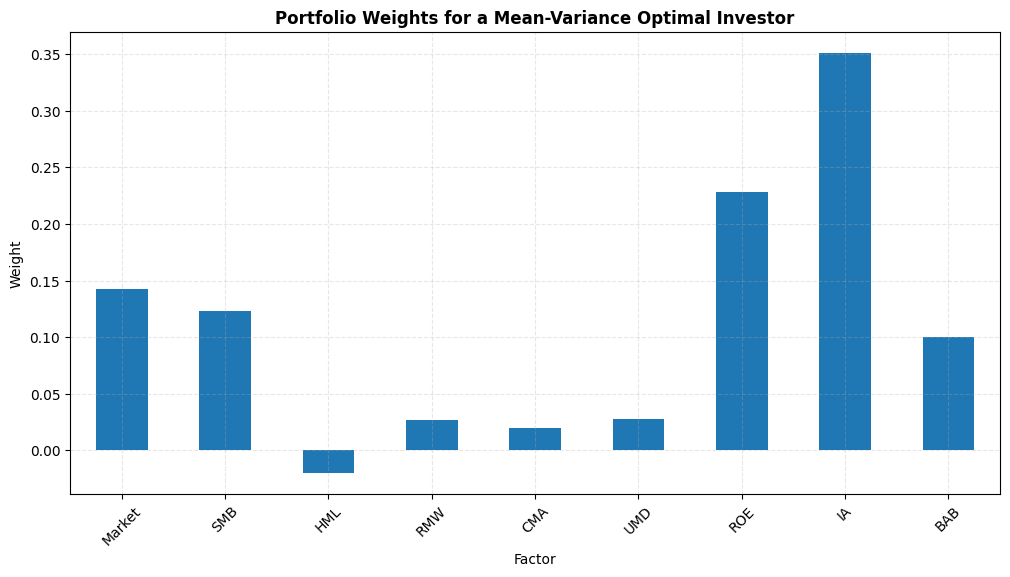

In [52]:
theta_opt.plot.bar(title='Portfolio Weights for a Mean-Variance Optimal Investor')
plt.xlabel('Factor')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Sharpe Ratios for individual factors
sharpe_ratio_ind = mu / facts.std()

# Sharpe Ratio of the parametric portfolio
mu_portfolio = theta_opt.T @ mu
vol_portfolio = np.sqrt(theta_opt.T @ cov @ theta_opt)
sharpe_ratio_param = mu_portfolio / vol_portfolio

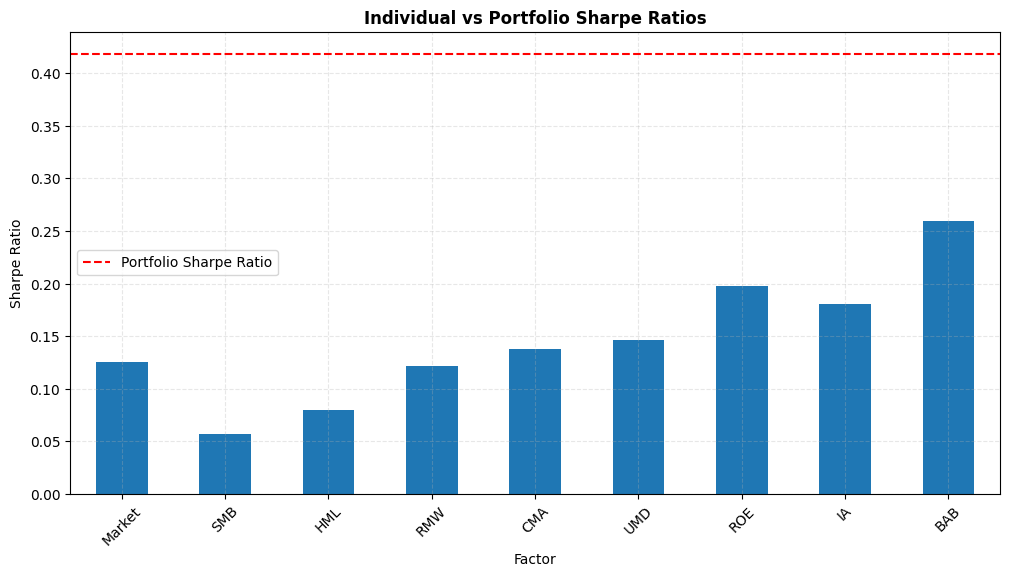

Portfolio Sharpe Ratio : 0.4185


In [71]:
# Comparaison of individual and portoflio sharpe ratios
sharpe_ratio_ind.plot.bar(title='Individual vs Portfolio Sharpe Ratios')
plt.axhline(y=sharpe_ratio_param, linestyle='--', c='r', label='Portfolio Sharpe Ratio')
plt.xlabel('Factor')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print(f'Portfolio Sharpe Ratio : {sharpe_ratio_param:.4f}')

The **parametric portfolio** Sharpe ratio exceeds all **individual** factor Sharpe ratios, showing that **diversification** across factors **reduces risk** without proportionally **reducing returns**, leading to a more efficient portfolio.

Each of the nine factor is itself a portfolio formed of the 2000 assets available in our universe. We note $W = w_{i,j}$ each of these weights. Thus, the weight of asset $i$ is given by $w_i^* = \sum_{j=1}^{9}\theta_j w_{i,j}$.

In matrix form, this is given my the matrix $w^*$ such that $w^* = W\theta$.

### **QUESTION 2**